In [1]:
!pip install pandas
!pip install Pyarrow
import pandas as pd
iter_csv = pd.read_csv('../data/globalterrorismdb_0718dist.csv', encoding='cp1252', iterator=True, chunksize=1000, usecols=['iyear', 'country', 'nkill', 'nwound'])
data = pd.concat([chunk[chunk['country'] == 167] for chunk in iter_csv]) # 167 - id Russia
data.drop('country', axis=1, inplace=True)
print(data)

        iyear  nkill  nwound
49694    1992    0.0     0.0
49704    1992    1.0     0.0
49834    1992    0.0     1.0
50077    1992    0.0     0.0
50186    1992    0.0     0.0
...       ...    ...     ...
180230   2017    3.0     5.0
180592   2017    2.0     0.0
181451   2017    0.0     1.0
181560   2017    0.0    18.0
181609   2017    0.0     1.0

[2194 rows x 3 columns]


<class 'pandas.core.series.Series'>


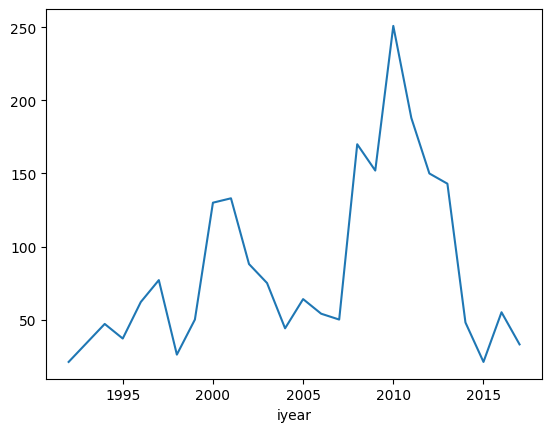

In [2]:
import matplotlib as mlt
import matplotlib.pyplot as plt

ter_count_by_year = data.groupby('iyear').count()['nkill']
ter_count_by_year.rename('ter_count', inplace=True)
print(type(ter_count_by_year))
ax = ter_count_by_year.plot()
plt.show()

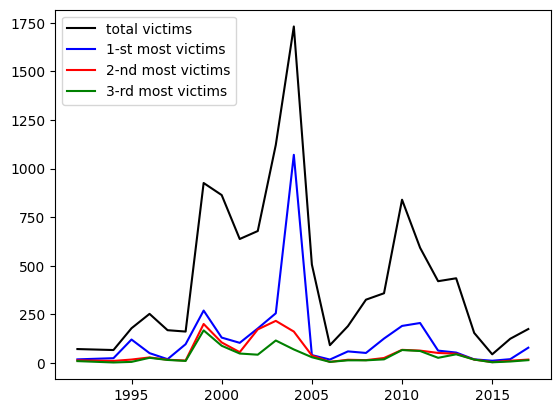

In [9]:
import matplotlib.pyplot as plt

data['victims_cnt'] = data['nkill'] + data['nwound']
df = data.drop(columns=['nkill', 'nwound'], axis=1)

total_victims_by_year = df.groupby('iyear').sum()
most_3_victims_by_year = df.sort_values(['iyear', 'victims_cnt'], ascending=[True, False]).groupby('iyear').head(3)

indexes_1 = [i*3   for i in range(len(most_3_victims_by_year) // 3)]
indexes_2 = [i*3+1 for i in range(len(most_3_victims_by_year) // 3)]
indexes_3 = [i*3+2 for i in range(len(most_3_victims_by_year) // 3)]

victims_1 = most_3_victims_by_year.iloc[indexes_1].groupby('iyear').sum()
victims_2 = most_3_victims_by_year.iloc[indexes_2].groupby('iyear').sum()
victims_3 = most_3_victims_by_year.iloc[indexes_3].groupby('iyear').sum()

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

ax1.plot(total_victims_by_year, 'k', label='total victims')
ax1.plot(victims_1, 'b', label='1-st most victims')
ax1.plot(victims_2, 'r', label='2-nd most victims')
ax1.plot(victims_3, 'g', label='3-rd most victims')

plt.legend(loc="upper left")
plt.show()

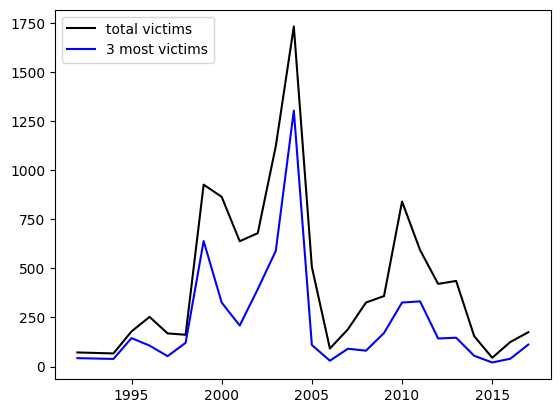

In [11]:
victims_123 = victims_1 + victims_2 + victims_3
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

ax1.plot(total_victims_by_year, 'k', label='total victims')
ax1.plot(victims_123, 'b', label='3 most victims')

plt.legend(loc="upper left")
plt.show()